In [1085]:
#load libraries
import pandas as pd
import numpy as np
from datetime import date
import pip
pip.main(['install','seaborn'])
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import random

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


In [1086]:
#sources: https://www.dataquest.io/blog/pandas-cheat-sheet/
#https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec
#https://pbpython.com/categorical-encoding.html
#https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
#https://analyticsindiamag.com/beginners-guide-to-k-means-clustering/

# Customer Segmentation & Personality Analysis



# Research Question

**How many clusters the customers can be grouped into and what are the major characteristics of each cluster?**

I'd like to use the dataset to conduct customer segmentation by dividing customers into mulitple groups based on their common characteristics. 
Since the dataset has no label/target variable, I'd like to use unsupervised learning such as K-means algorithm. I also plan to use principal 
component analysis (PCA) to first reduce the dimensionality of the data. 

The dataset "Marketing Campaign" is sourced from the Kaggle website. The goal of the project is to conduct customer 
segmentation for this grocery store so they can better understand their consumers and develop various marketing strategies 
to target different groups of consumers. 

Last updated in August 2021, the dataset is collected by an individual contributor on Kaggle for research purposes. There are 
28 features covering 4 major areas around customers' characteristics and their shopping behaviors, including people, products, 
promotion, and place. 

Data Link: https://www.kaggle.com/imakash3011/customer-personality-analysis

# Data Transformation & Cleaning

In [1087]:
#load the data
#making a list of missing value types

missing_values= ['n/a', 'na', ' ']
customer= pd.read_csv('/Users/ruizhewang/Downloads/marketing_campaign.csv', sep= '\t', na_values= missing_values )

customer.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [1088]:
#view/inspect the data

#check df shape
print(customer.shape)

#get data summary
print(customer.describe())

#check data types
print(customer.dtypes)

(2240, 29)
                 ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000    

The dataset has 29 columns and 2240 rows. The columns are ID, Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome,
Dt_Customer, Recency, Complain, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases,
AcceptedCmp1, AcceptedCmp2, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, Response, NumWebPurchases, NumCatalogPurchases, NumStorePurchases,
and NumWebVisitsMonth. 

Most data types are appropriate except for Dt_Customer. The categories for Education and Marital Status need to be cleaned. 

In [1089]:
#check unique values for categorical variables
customer['Education'].unique()
customer['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [1090]:
#clean Education and Marital_Status columns
customer['Marital_Status'] = customer['Marital_Status'].replace({
'Married': 'Together', 
'Alone': 'Single', 
'Absurd': 'Single', 
'Divorced': 'Single', 
'Widow': 'Single', 
'Divorced': 'Single', 
'YOLO': 'Single'})

customer['Education']= customer['Education'].replace({
'Basic': 'Others',
'2n Cycle': 'Others'
})

In [1091]:
#check for missing values for each column
customer.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

Income has 24 missing values. Other columns have no missing value issue. 

In [1092]:
#convert the inapppropriate data types
pd.to_datetime(customer['Dt_Customer'])

0      2012-04-09
1      2014-08-03
2      2013-08-21
3      2014-10-02
4      2014-01-19
          ...    
2235   2013-06-13
2236   2014-10-06
2237   2014-01-25
2238   2014-01-24
2239   2012-10-15
Name: Dt_Customer, Length: 2240, dtype: datetime64[ns]

In [1093]:
#replace all missing values in Income with its mean
customer['Income']= customer['Income'].fillna(customer['Income'].mean())

#re-check the missing values for Income
customer['Income'].isna().sum()

0

In [1094]:
#create new columns based on Year_Birth and Dt_Customer

#create function for age
def age(Year_Birth):
    todays_date= date.today()
    age= todays_date.year - Year_Birth
    return age

customer['age']= age(customer['Year_Birth'])

#calculate the number of years since first enrollment and create new column years_of_enrollment 
todays_date= date.today()
enrollment_year= pd.DatetimeIndex(customer['Dt_Customer']).year
customer['years_of_enrollment']= todays_date.year - enrollment_year

I create two new features age and years_of_enrollment using Year_Birth and Dt_Customer. 

In [1095]:
#re-inspect the customer data

customer.head()

#summarize new columns age and years_of_enrollment
customer['age'].describe()
customer['years_of_enrollment'].describe()

#replace age that greater than 100 with its mean
customer['age'].values[customer['age']>100] = customer['age'].mean()

#re-check age column
customer['age'].describe()


count    2240.000000
mean       53.098214
std        11.694076
min        26.000000
25%        45.000000
50%        52.000000
75%        63.000000
max        82.000000
Name: age, dtype: float64

Column age has outliers with age above 100. I replace those outliers with the mean. 

In [1096]:
#drop useless columns from the dataset
customer= customer.drop(['ID', 'Year_Birth', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue'], axis= 1)

I continue to clean the data by dropping useless features: ID, Year_Birth, Dt_Customer, Z_CostContact and Z_Revenue. 

In [1097]:
#get a duplicate of the customer data

customer_copy= customer.copy()

In [1098]:
#view the customer data after the data processing

customer.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,age,years_of_enrollment
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,7,0,0,0,0,0,0,1,65,10
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,5,0,0,0,0,0,0,0,68,8
2,Graduation,Together,71613.0,0,0,26,426,49,127,111,...,4,0,0,0,0,0,0,0,57,9
3,Graduation,Together,26646.0,1,0,26,11,4,20,10,...,6,0,0,0,0,0,0,0,38,8
4,PhD,Together,58293.0,1,0,94,173,43,118,46,...,5,0,0,0,0,0,0,0,41,8


# Data Visualization & Exploratory Data Analysis

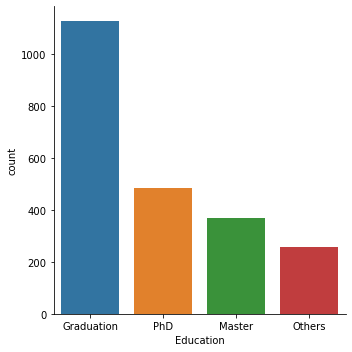

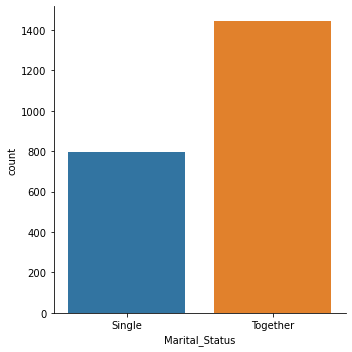

In [1099]:
#create bar charts for categorical variables

#barchart for Education
sns.catplot(x= 'Education', kind= 'count', data= customer)

#barchart for Marital_Status
sns.catplot(x= 'Marital_Status', kind= 'count', data= customer)



The bar charts above show that a majority of customers have college-level education and they live together with partners or spouses. 

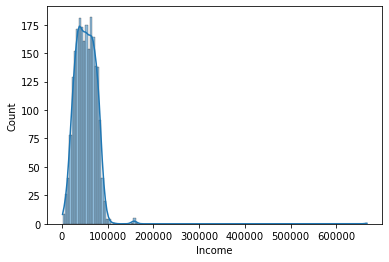

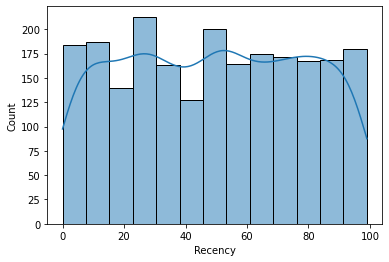

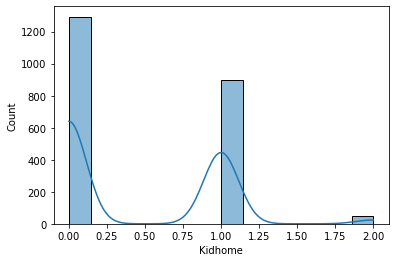

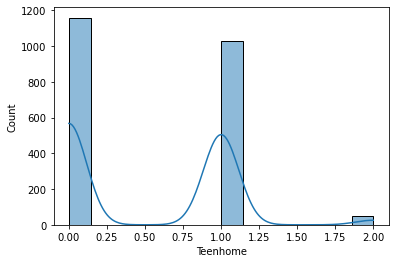

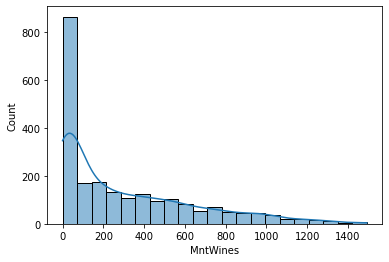

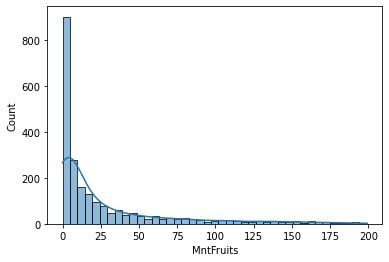

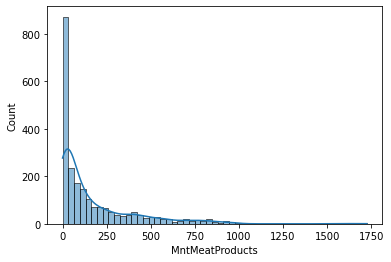

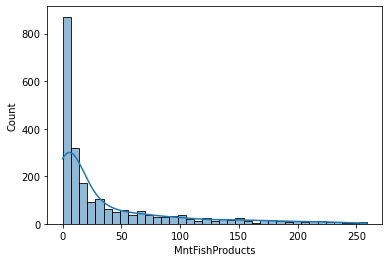

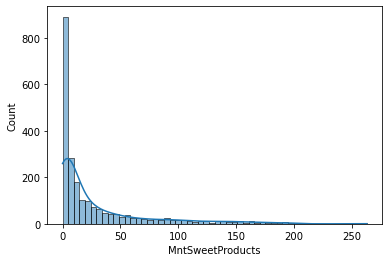

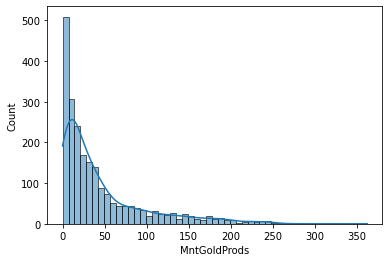

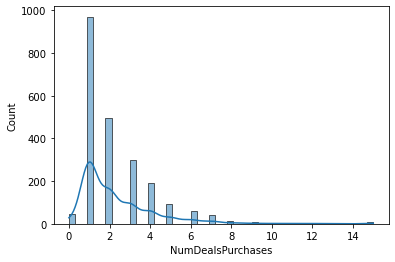

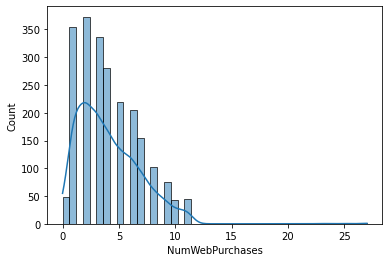

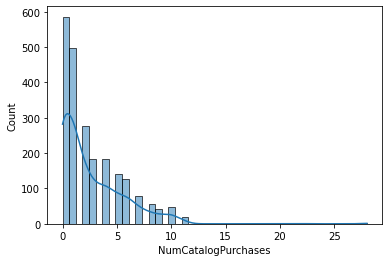

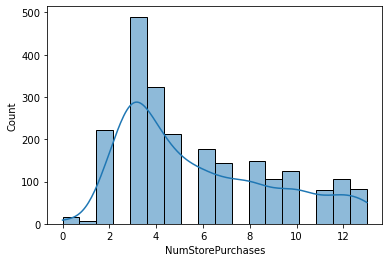

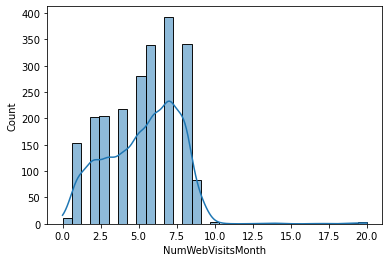

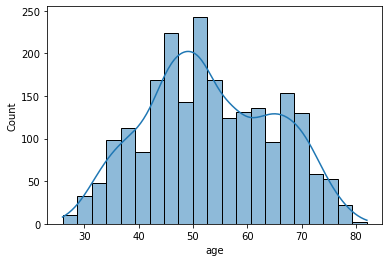

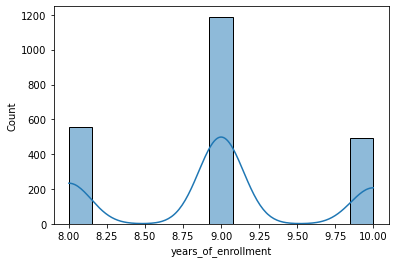

In [1100]:
#create histogram for selected numeric variables

selected_col= ['Income', 'Recency', 'Kidhome', 'Teenhome', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'age', 'years_of_enrollment']

for column in selected_col:
    plt.figure()
    sns.histplot(data= customer, x= column, kde= True)
    plt.show()


The histograms above help us to better understand the distribution of continuous variables. 

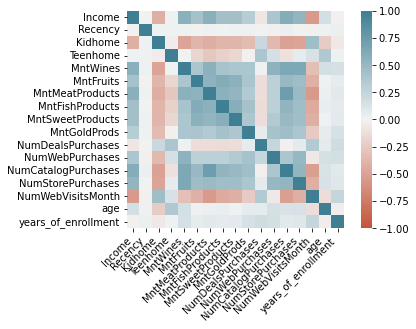

In [1101]:
#create correlation matrix for selected numeric columns
corr= customer[selected_col].corr()
ax= sns.heatmap(
    corr,
    vmin= -1, vmax= 1, center= 0,
    cmap= sns.diverging_palette(20, 220, n=200),
    square= True
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

The correlation matrix above shows there exist moderate positive or negative relationships between variables. 

# Principal Component Analysis (PCA)

**Since it is a multivariate dataset and the variables are correlated with each other, I will first use the Principal Component Analysis (PCA)**
**to reduce the dimensionality of the data. By transforming a large set of correlated variables with several uncorrelated new variables (principal**
**components), PCA helps us to produce a more simple dataset for further machine learning while at the same time retaining as much information**
**as possible.**

In [1102]:
#standarize the dataframe
customer[selected_col]= StandardScaler().fit_transform(customer[selected_col])

#check df
customer.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,age,years_of_enrollment
0,Graduation,Single,0.235327,-0.825218,-0.929894,0.307039,0.983781,1.551577,1.679702,2.462147,...,0.693904,0,0,0,0,0,0,1,1.017989,1.502225
1,Graduation,Single,-0.235826,1.032559,0.906934,-0.383664,-0.870479,-0.636301,-0.713225,-0.650449,...,-0.130463,0,0,0,0,0,0,0,1.274587,-1.420036
2,Graduation,Together,0.773633,-0.825218,-0.929894,-0.798086,0.362723,0.570804,-0.177032,1.345274,...,-0.542647,0,0,0,0,0,0,0,0.333729,0.041094
3,Graduation,Together,-1.022732,1.032559,-0.929894,-0.798086,-0.870479,-0.560857,-0.651187,-0.503974,...,0.281720,0,0,0,0,0,0,0,-1.291388,-1.420036
4,PhD,Together,0.241519,1.032559,-0.929894,1.550305,-0.389085,0.419916,-0.216914,0.155164,...,-0.130463,0,0,0,0,0,0,0,-1.034790,-1.420036


Before conducting PCA, I first standardize the continuous variables to a mean of 0 and standard deviation of 1 so each one of them 
contribues equally to the analysis. 

In [1103]:
#use one hot encoding to deal with categorical variables

cleaned_customer= pd.get_dummies(customer, columns= ['Education', 'Marital_Status'])

cleaned_customer.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Complain,Response,age,years_of_enrollment,Education_Graduation,Education_Master,Education_Others,Education_PhD,Marital_Status_Single,Marital_Status_Together
0,0.235327,-0.825218,-0.929894,0.307039,0.983781,1.551577,1.679702,2.462147,1.476500,0.843207,...,0,1,1.017989,1.502225,1,0,0,0,1,0
1,-0.235826,1.032559,0.906934,-0.383664,-0.870479,-0.636301,-0.713225,-0.650449,-0.631503,-0.729006,...,0,0,1.274587,-1.420036,1,0,0,0,1,0
2,0.773633,-0.825218,-0.929894,-0.798086,0.362723,0.570804,-0.177032,1.345274,-0.146905,-0.038766,...,0,0,0.333729,0.041094,1,0,0,0,0,1
3,-1.022732,1.032559,-0.929894,-0.798086,-0.870479,-0.560857,-0.651187,-0.503974,-0.583043,-0.748179,...,0,0,-1.291388,-1.420036,1,0,0,0,0,1
4,0.241519,1.032559,-0.929894,1.550305,-0.389085,0.419916,-0.216914,0.155164,-0.001525,-0.556446,...,0,0,-1.034790,-1.420036,0,0,0,1,0,1


I then use one-hot encoding method to deal with the categorical variables. 

In [1104]:
#conduct PCA on cleaned customer
#set the number of components as the total number of columns of 30
pca= PCA(n_components=30)
pca.fit(cleaned_customer)

PCA(n_components=30)

Since the dataset has 30 columns, there are a maximum of 30 principal components. I use n_components=30 in the PCA algorithm. 

In [1105]:
#show how much variance has been explained by each of the 30 principal components
print(pca.explained_variance_ratio_)

#print the eigenvalues
print(pca.explained_variance_)

[3.28798530e-01 1.09168561e-01 7.69435462e-02 5.47358535e-02
 4.75791311e-02 4.59899253e-02 4.01110593e-02 3.43277789e-02
 3.14366446e-02 2.63324134e-02 2.50153835e-02 2.44294778e-02
 2.29308159e-02 2.09902719e-02 1.93189441e-02 1.72188946e-02
 1.62107081e-02 1.33040389e-02 1.18694998e-02 9.78430589e-03
 6.22060054e-03 5.92424935e-03 3.56403499e-03 2.52625615e-03
 2.26186499e-03 1.90575352e-03 6.05030624e-04 4.96425823e-04
 2.55487552e-33 2.19081496e-33]
[6.09567691e+00 2.02390284e+00 1.42647535e+00 1.01476147e+00
 8.82081228e-01 8.52618549e-01 7.43628806e-01 6.36411146e-01
 5.82811696e-01 4.88183096e-01 4.63766354e-01 4.52904105e-01
 4.25120043e-01 3.89143819e-01 3.58158662e-01 3.19225326e-01
 3.00534310e-01 2.46646854e-01 2.20051580e-01 1.81393656e-01
 1.15325245e-01 1.09831117e-01 6.60745222e-02 4.68348848e-02
 4.19332720e-02 3.53312338e-02 1.12168117e-02 9.20336056e-03
 4.73654664e-32 4.06160580e-32]


The output shows 1) the percentage of variance that can be explained by each principal components and 2) the eigenvalues. 

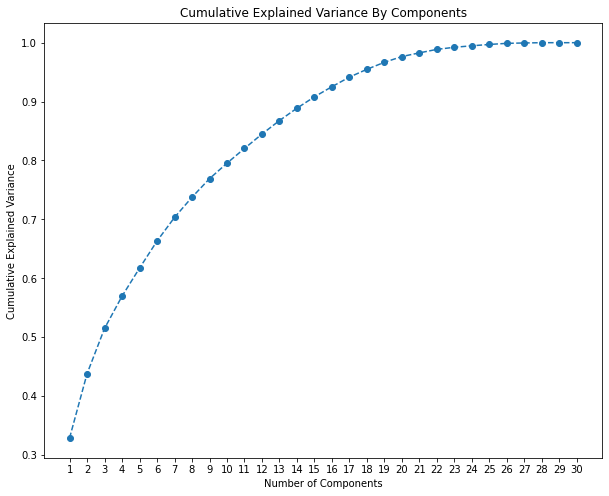

In [1106]:
#create scree plot to show the number of components and the variance explained
plt.figure(figsize= (10, 8))
plt.plot(range(1,31), pca.explained_variance_ratio_.cumsum(), marker= 'o', linestyle= '--')
plt.xticks(range(1,31))
plt.title('Cumulative Explained Variance By Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance');

The plot above shows the relationship between number of components and the cumulative explained variance. The first 4 PC explain approximately 
58% of the total variance and each of them have eigenvalues greater than 1. Thus, retaining four principal components should be appropriate. 

In [1107]:
#keep the first four principal components
random.seed(123)

pca_fit= PCA(n_components= 4, svd_solver = 'full')
PrincipalComponents= pca_fit.fit_transform(cleaned_customer)

#get the final dataset after the PCA 
random.seed(123)

PrincipalDF= pd.DataFrame(data= PrincipalComponents,
                          columns= ['PC1', 'PC2', 'PC3', 'PC4'])

Run PCA using the first 4 PCs and transform the dataset represented by those 4 PCs. 

In [1108]:
#check PrincipalDF
PrincipalDF.head()

,PC1,PC2,PC3,PC4
0,3.906081,0.424925,2.021901,-0.490472
1,-2.332373,-0.254327,-2.004880,0.260912
2,1.883652,-0.225383,-0.079454,0.938886
3,-2.517515,-1.626486,0.235465,0.913172
4,-0.347784,-0.472848,0.421977,-1.269237


# K-Means Algorithm 

**After the data dimensionality has been reduced, I'd like to use K-Means algorithm to cluster the data into multiple groups so that customers** 
**within the same group share great similairites. K-means is a simple and popular unsupervised learning algorithm that can be applied to many**
**real-world senarios like customer segmentation, document clustering, image segmentation, etc.**

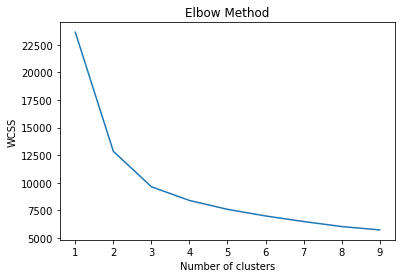

In [1109]:
#using elbow graph to find the optimum number of clusters
wcss=[]
for i in range(1,10):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(PrincipalDF)
    wcss.append(kmeans.inertia_) #append the WCSS to the list
plt.plot(range(1, 10), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The graph above shows the relationship between number of clusters and WCSS. WCSS is the sum of squared distance between each point 
and the centroid in a cluster. As the number of clusters increases, the WCSS decreases. The elbow is at 3 clusters. Thus, 3 clusters should be
appropriate. 

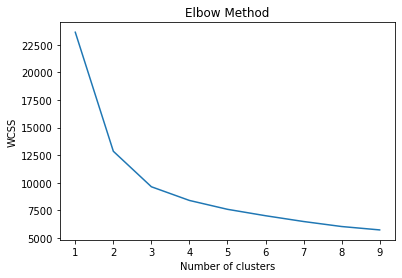

In [1110]:
#change model parameters 
#using elbow graph to find the optimum number of clusters
wcss=[]
for i in range(1,10):
    kmeans = KMeans(n_clusters=i, init='random', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(PrincipalDF)
    wcss.append(kmeans.inertia_) #append the WCSS to the list
plt.plot(range(1, 10), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

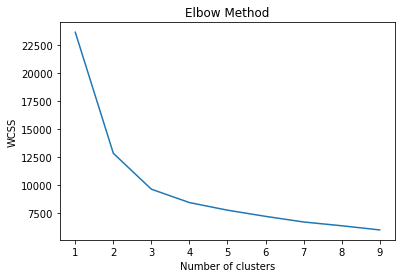

In [1111]:
#change model parameters 
#using elbow graph to find the optimum number of clusters
wcss=[]
for i in range(1,10):
    kmeans = KMeans(n_clusters=i, init='random', max_iter=3, n_init=10, random_state=42)
    kmeans.fit(PrincipalDF)
    wcss.append(kmeans.inertia_) #append the WCSS to the list
plt.plot(range(1, 10), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

**By experimenting with different model parameter, there is little change in the WCSS. We still pick 3 as the number of clusters.**

In [1112]:
#fitting K-means to the dataset
random.seed(123)

kmeans_model= KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)

#return the cluster assignment
random.seed(123)

cluster_assignment= kmeans_model.fit_predict(PrincipalDF)

In [1113]:
#assign the cluster assignment back to the cleaned_customer dataset

customer_copy['cluster']= cluster_assignment


# Customer Analytics 

Based on the cluster assignment for each individual customer, I'd like to examine the customer charateristics for each cluster. 

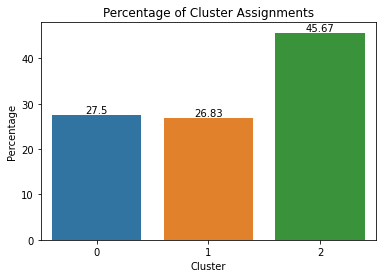

In [1114]:
#look at the summary of clusters
cluster_count= pd.DataFrame(customer_copy.groupby(['cluster']).size().reset_index(name= 'count'))

cluster_count['percentage']= round(100*cluster_count['count']/cluster_count['count'].sum(),2)

#create bar chart 
ax= sns.barplot(data= cluster_count, x= 'cluster', y= 'percentage')
plt.title('Percentage of Cluster Assignments')
plt.xlabel('Cluster')
plt.ylabel('Percentage')
ax.bar_label(ax.containers[0]);

Approximately 45.56% of the customers have been assigned to cluster 2, while 27.5% and 26.83% has been assigned to cluster 0 and 1, respectively. 

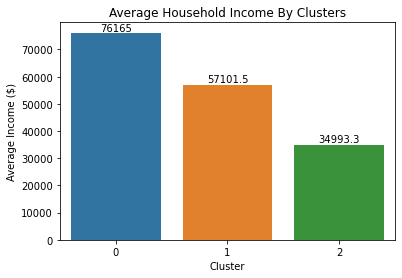

In [1115]:
#examine the average income between clusters
income_summary= customer_copy.groupby(['cluster'], as_index= False)['Income'].mean()

#create bar chart
ax= sns.barplot(data= income_summary, x= 'cluster', y= 'Income')
plt.title('Average Household Income By Clusters')
plt.xlabel('Cluster')
plt.ylabel('Average Income ($)')
ax.bar_label(ax.containers[0]);

Customers in Cluster 0 have the highest average household income of $76,165 per year. 

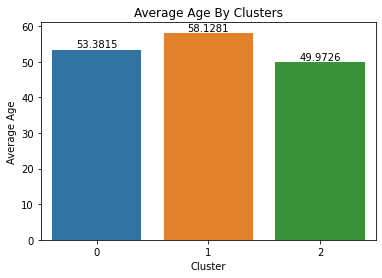

In [1116]:
#examine the average age between clusters
income_summary= customer_copy.groupby(['cluster'], as_index= False)['age'].mean()

#create bar chart
ax= sns.barplot(data= income_summary, x= 'cluster', y= 'age')
plt.title('Average Age By Clusters')
plt.xlabel('Cluster')
plt.ylabel('Average Age')
ax.bar_label(ax.containers[0]);

Customers in Cluster 1 are the oldest with an average age of 58.1, while customers in Cluster 2 are the youngest with an average age
of 49.97. 

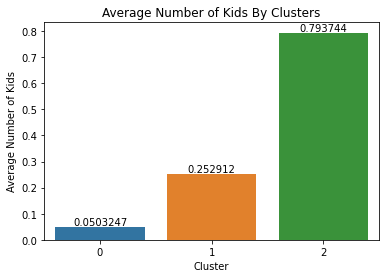

In [1117]:
#examine the average number of kids between clusters
income_summary= customer_copy.groupby(['cluster'], as_index= False)['Kidhome'].mean()

#create bar chart
ax= sns.barplot(data= income_summary, x= 'cluster', y= 'Kidhome')
plt.title('Average Number of Kids By Clusters')
plt.xlabel('Cluster')
plt.ylabel('Average Number of Kids')
ax.bar_label(ax.containers[0]);

Customers in Cluster 2 have the highest number of kids, while customers in Cluster 0 have the lowest number of kids. 

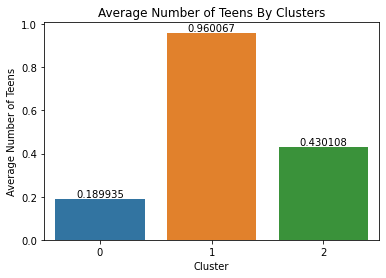

In [1118]:
#examine the average number of teens between clusters
income_summary= customer_copy.groupby(['cluster'], as_index= False)['Teenhome'].mean()

#create bar chart
ax= sns.barplot(data= income_summary, x= 'cluster', y= 'Teenhome')
plt.title('Average Number of Teens By Clusters')
plt.xlabel('Cluster')
plt.ylabel('Average Number of Teens')
ax.bar_label(ax.containers[0]);

Customers in Cluster 1 have the highest number of teens, while customers in Cluster 0 have the lowest number of kids. 

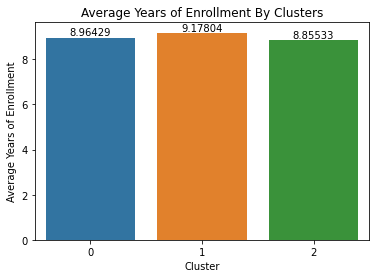

In [1119]:
#examine the average years of enrollment between clusters
income_summary= customer_copy.groupby(['cluster'], as_index= False)['years_of_enrollment'].mean()

#create bar chart
ax= sns.barplot(data= income_summary, x= 'cluster', y= 'years_of_enrollment')
plt.title('Average Years of Enrollment By Clusters')
plt.xlabel('Cluster')
plt.ylabel('Average Years of Enrollment')
ax.bar_label(ax.containers[0]);

All three clusters have similiar years of enrollment with the grocery store. 

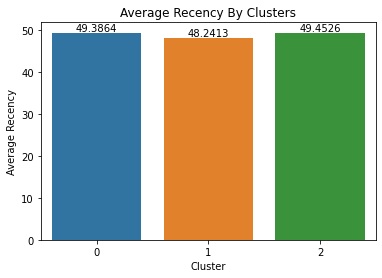

In [1120]:
#examine the average recency between clusters
income_summary= customer_copy.groupby(['cluster'], as_index= False)['Recency'].mean()

#create bar chart
ax= sns.barplot(data= income_summary, x= 'cluster', y= 'Recency')
plt.title('Average Recency By Clusters')
plt.xlabel('Cluster')
plt.ylabel('Average Recency')
ax.bar_label(ax.containers[0]);

All three clusters have similiar number of days since their last purchase. 

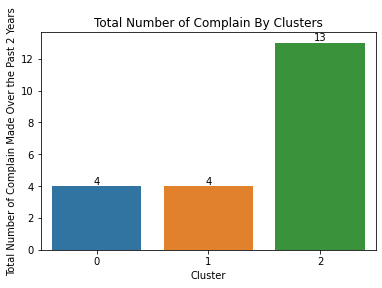

In [1121]:
#examine the total number of complain between clusters
income_summary= customer_copy.groupby(['cluster'], as_index= False)['Complain'].sum()

#create bar chart
ax= sns.barplot(data= income_summary, x= 'cluster', y= 'Complain')
plt.title('Total Number of Complain By Clusters')
plt.xlabel('Cluster')
plt.ylabel('Total Number of Complain Made Over the Past 2 Years')
ax.bar_label(ax.containers[0]);

Customers in Cluster 2 made the most complain over the past two years. 

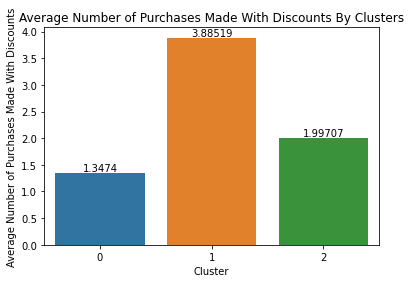

In [1122]:
#examine the average number of purchase made with a discount between clusters
income_summary= customer_copy.groupby(['cluster'], as_index= False)['NumDealsPurchases'].mean()

#create bar chart
ax= sns.barplot(data= income_summary, x= 'cluster', y= 'NumDealsPurchases')
plt.title('Average Number of Purchases Made With Discounts By Clusters')
plt.xlabel('Cluster')
plt.ylabel('Average Number of Purchases Made With Discounts')
ax.bar_label(ax.containers[0]);

Customers in Cluster 1 have the highest number of purchases made with discounts. 

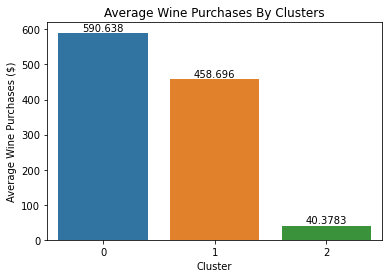

In [1123]:
#examine the average wine purchase between clusters
income_summary= customer_copy.groupby(['cluster'], as_index= False)['MntWines'].mean()

#create bar chart
ax= sns.barplot(data= income_summary, x= 'cluster', y= 'MntWines')
plt.title('Average Wine Purchases By Clusters')
plt.xlabel('Cluster')
plt.ylabel('Average Wine Purchases ($)')
ax.bar_label(ax.containers[0]);

On average, customers in Cluster 0 spent the most amount of money on wine, while customers in Cluster 2 spent the least amount of money. 

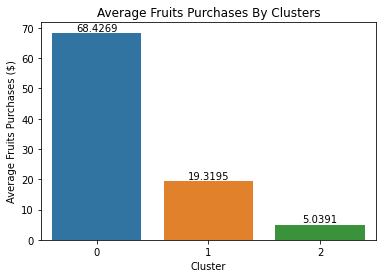

In [1124]:
#examine the average fruits purchase between clusters
income_summary= customer_copy.groupby(['cluster'], as_index= False)['MntFruits'].mean()

#create bar chart
ax= sns.barplot(data= income_summary, x= 'cluster', y= 'MntFruits')
plt.title('Average Fruits Purchases By Clusters')
plt.xlabel('Cluster')
plt.ylabel('Average Fruits Purchases ($)')
ax.bar_label(ax.containers[0]);

On average, customers in Cluster 0 spent the most amount of money on fruits, while customers in Cluster 2 spent the least amount of money. 

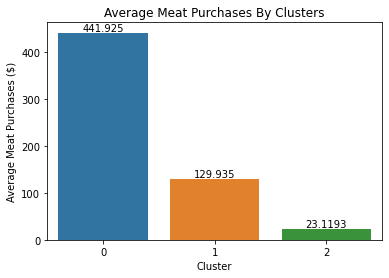

In [1125]:
#examine the average meat purchase between clusters
income_summary= customer_copy.groupby(['cluster'], as_index= False)['MntMeatProducts'].mean()

#create bar chart
ax= sns.barplot(data= income_summary, x= 'cluster', y= 'MntMeatProducts')
plt.title('Average Meat Purchases By Clusters')
plt.xlabel('Cluster')
plt.ylabel('Average Meat Purchases ($)')
ax.bar_label(ax.containers[0]);

On average, customers in Cluster 0 spent the most amount of money on meat, while customers in Cluster 2 spent the least amount of money. 

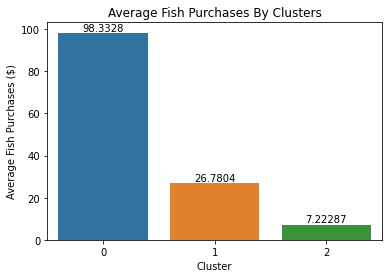

In [1126]:
#examine the average fish purchase between clusters
income_summary= customer_copy.groupby(['cluster'], as_index= False)['MntFishProducts'].mean()

#create bar chart
ax= sns.barplot(data= income_summary, x= 'cluster', y= 'MntFishProducts')
plt.title('Average Fish Purchases By Clusters')
plt.xlabel('Cluster')
plt.ylabel('Average Fish Purchases ($)')
ax.bar_label(ax.containers[0]);

On average, customers in Cluster 0 spent the most amount of money on fish, while customers in Cluster 2 spent the least amount of money. 

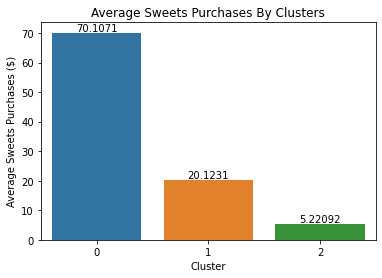

In [1127]:
#examine the average sweet purchase between clusters
income_summary= customer_copy.groupby(['cluster'], as_index= False)['MntSweetProducts'].mean()

#create bar chart
ax= sns.barplot(data= income_summary, x= 'cluster', y= 'MntSweetProducts')
plt.title('Average Sweets Purchases By Clusters')
plt.xlabel('Cluster')
plt.ylabel('Average Sweets Purchases ($)')
ax.bar_label(ax.containers[0]);

On average, customers in Cluster 0 spent the most amount of money on sweets, while customers in Cluster 2 spent the least amount of money. 

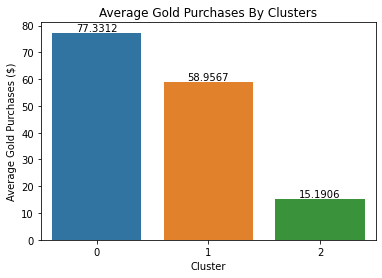

In [1128]:
#examine the average gold purchase between clusters
income_summary= customer_copy.groupby(['cluster'], as_index= False)['MntGoldProds'].mean()

#create bar chart
ax= sns.barplot(data= income_summary, x= 'cluster', y= 'MntGoldProds')
plt.title('Average Gold Purchases By Clusters')
plt.xlabel('Cluster')
plt.ylabel('Average Gold Purchases ($)')
ax.bar_label(ax.containers[0]);

On average, customers in Cluster 0 spent the most amount of money on gold, while customers in Cluster 2 spent the least amount of money. 

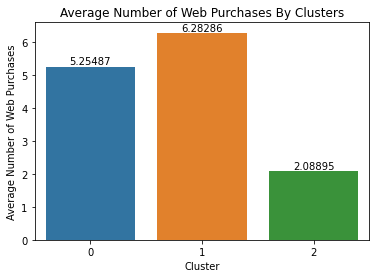

In [1129]:
#examine the number of web purchases between clusters
income_summary= customer_copy.groupby(['cluster'], as_index= False)['NumWebPurchases'].mean()

#create bar chart
ax= sns.barplot(data= income_summary, x= 'cluster', y= 'NumWebPurchases')
plt.title('Average Number of Web Purchases By Clusters')
plt.xlabel('Cluster')
plt.ylabel('Average Number of Web Purchases')
ax.bar_label(ax.containers[0]);

On average, customers in Cluster 1 made the highest number of web purchases, while customers in Cluster 2 made the lowest number of web purchases.

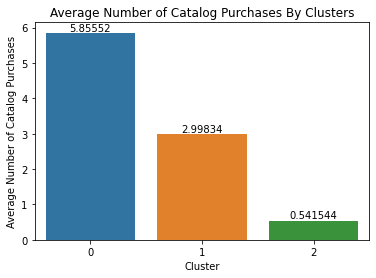

In [1130]:
#examine the number of catalog purchases between clusters
income_summary= customer_copy.groupby(['cluster'], as_index= False)['NumCatalogPurchases'].mean()

#create bar chart
ax= sns.barplot(data= income_summary, x= 'cluster', y= 'NumCatalogPurchases')
plt.title('Average Number of Catalog Purchases By Clusters')
plt.xlabel('Cluster')
plt.ylabel('Average Number of Catalog Purchases')
ax.bar_label(ax.containers[0]);

On average, customers in Cluster 0 made the highest number of catalog purchases, while customers in Cluster 2 made the lowest number of catalog purchases.

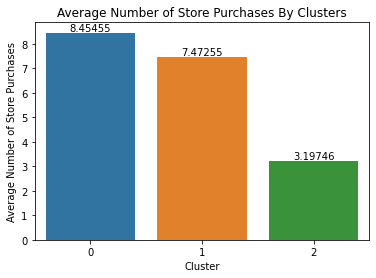

In [1131]:
#examine the number of store purchases between clusters
income_summary= customer_copy.groupby(['cluster'], as_index= False)['NumStorePurchases'].mean()

#create bar chart
ax= sns.barplot(data= income_summary, x= 'cluster', y= 'NumStorePurchases')
plt.title('Average Number of Store Purchases By Clusters')
plt.xlabel('Cluster')
plt.ylabel('Average Number of Store Purchases')
ax.bar_label(ax.containers[0]);

On average, customers in Cluster 0 made the highest number of store purchases, while customers in Cluster 2 made the lowest number of store purchases.

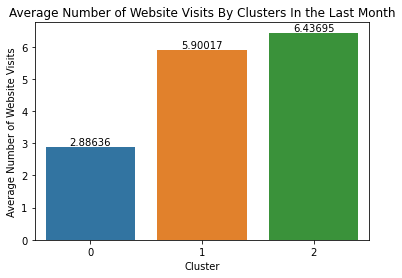

In [1132]:
#examine the number of website visits in the last month between clusters
income_summary= customer_copy.groupby(['cluster'], as_index= False)['NumWebVisitsMonth'].mean()

#create bar chart
ax= sns.barplot(data= income_summary, x= 'cluster', y= 'NumWebVisitsMonth')
plt.title('Average Number of Website Visits By Clusters In the Last Month')
plt.xlabel('Cluster')
plt.ylabel('Average Number of Website Visits')
ax.bar_label(ax.containers[0]);

On average, customers in Cluster 2 made the highest number of website visits in the last month, while customers in Cluster 0 made the lowest number of website visits.

**Based on the analysis, I identify the following characteristics for each cluster:**

    - Cluster 0: Middle-age high income customers with strong buying power, particularly on wine, meat and fish products. They prefer to purchase in store or through catalog. 

    - Cluster 1: Middle-age medium income customers living with teens. They enjoy using discount and they spend lots of money on wine and gold products. They prefer to shop through the store website. 
    
    - Cluster 2: Young low income customers with kids. They are more likely to make complain and they have relatively weak buying power compared to other customers. Over the past month, they frequently visit the store website. 


# Recommendations:

- Target cusotmers in Cluster 0 by providing high-quality wine, meat and fish products and put the advertisements in store or through catalog.
- Put more wine and gold products discounts on the website to drive traffic from customers in Cluster 1 and create more engegement with them.
- To engage with customer in Cluster 2, we can try putting more kids-related products on the store website.

# Challenges & Next Steps:

- There exists trade-off between the interpretability of principal components and the information loss. Retaining a small number of components may
lead to information loss. 

- There is no data around customers' web activities. Customers' activity data on the store website can provide us a new perspective in examining
their shopping behaviors and developing personalized marking strategies. 

- Overall we generate meaningful results from the models, thus the downside of PCA is negligible in this case. 

# Benefits & Harms
- The model helps the business to make informed decisons and achieve goals through understanding their customers better. 
- The models helps to segment the customers and allow the business to personalize the marketing strategies and improve shopping experience. 
- The algorithm may make the business to favor the customer in Cluster 0 since they have high income and strong buying power, while they may 
discriminate the customers in the lower income and weaker buying power clusters. 
- The algorithm may reinforce the social inequality between different groups of customers. High income customers may receive more marketing 
campaigns on expensive and high-quality products, while low income customers may only receive information on discounted and relatively 
low-quality products. They are not treated equally by the business in terms of the marketing campaign. 


# Future Research Question
What is the customer lifetime value for this business? 

Customer lifetime value (CLV) plays a significant role in balancing the short-term and long-term marketing goals. It measures on average how much 
value a customer will bring throughout his/her whole lifetime with the business. CLV helps the business to measure the financial returns 
on their investments. 
